In [33]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # adjust the configuration of the plots that we will create

#import data

df = pd.read_csv('movies.csv')

In [2]:
# Look at the data
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

     released  score      votes         director                   writer  \
0  1980-06-13    8.4   927000.0  Stanley Kubrick             Stephen King   
1  1980-07-02    5.8    65000.0   Randal Kleiser  Henry De Vere Stacpoole   
2  1980-06-20    8.7  1200000.0   Irvin Kershner           Leigh Brackett   
3  1980-07-02    7.7   221000.0     Jim Abrahams             Jim Abrahams   
4  1980-07-25    7.3   108000.0     Harold Ramis       Brian Doyle-Murray   

             star         country      budget        gross  \
0  Jack Nicholson  United Kingdom  19000000.0   46998772.0   
1  Brooke Shields   United States   4500000.0   58853106.0   
2     Mark Hamill   United States  18000000.0  538375067.0   
3     Robert Hays   United States   3500000.0   83453539.0   
4     Chevy Chase   United States   6000000.0   39846344.0   

              company  runtime  
0        Warner Bros.    146.0  
1   Columbia Pictures    104.0  
2           Lucasfilm    124.0  
3  Paramount Pictures     88.0  
4      Orion Pictures     98.0

In [11]:
# Start by Data Cleaning the Dataset

# Look to see if there are missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%
correct_year - 0.0%


In [10]:
# Removed the Null Values if there are any
df.dropna(inplace= True)

In [12]:
# Data types for columns
df.dtypes

name             object
rating           object
genre            object
year              int64
released         object
score           float64
votes           float64
director         object
writer           object
star             object
country          object
budget            Int64
gross             Int64
company          object
runtime         float64
correct_year     object
dtype: object

In [13]:
# change data types of columns

df['budget'] = df['budget'].astype('Int64')

df['gross'] = df['gross'].astype('Int64')

In [15]:
# Create a Correct Year column
df['correct_year'] = df['released'].astype(str).str[:4]

In [16]:
# run cell to make sure Correct Year column was added
df

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year    released  score      votes         director  \
0     1980  1980-06-13    8.4   927000.0  Stanley Kubrick   
1     1980  1980-07-02    5.8    65000.0   Randal Kleiser   
2     1980  1980-06-20    8.7  1200000.0   Irvin Kershner   
3     1980  1980-07-02    7.7   221000.0     Jim Abrahams   
4     1980  1980-07-25    7.3   108000.0     Harold Ramis   
...    ...         ...    ...        ...              ...   
7648  2020  2020-01-17    6.6   140000.0     Adil El Arbi   
7649  2020  2020-02-14    6.5   102000.0      Jeff Fowler   
7650  2020  2020-01-17    5.6    53000.0   Stephen Gaghan   
7651  2020  2020-02-21    6.8    42000.0    Chris Sanders   
7652  2020  2020-08-28    6.8     3700.0          Hu Guan   

                       writer               star         country     budget  \
0                Stephen King     Jack Nicholson  United Kingdom   19000000   
1     Henry De Vere Stacpoole     Brooke Shields   United States    4500000   
2              Leigh Brackett        Mark Hamill   United States   18000000   
3                Jim Abrahams        Robert Hays   United States    3500000   
4          Brian Doyle-Murray        Chevy Chase   United States    6000000   
...                       ...                ...             ...        ...   
7648              Peter Craig         Will Smith   United States   90000000   
7649                Pat Casey       Ben Schwartz   United States   85000000   
7650           Stephen Gaghan  Robert Downey Jr.   United States  175000000   
7651            Michael Green      Harrison Ford          Canada  135000000   
7652                  Hu Guan    Zhi-zhong Huang           China   80000000   

          gross                              company  runtime correct_year  
0      46998772                         Warner Bros.    146.0         1980  
1      58853106                    Columbia Pictures    104.0         1980  
2     538375067                            Lucasfilm    124.0         1980  
3      83453539                   Paramount Pictures     88.0         1980  
4      39846344                       Orion Pictures     98.0         1980  
...         ...                                  ...      ...          ...  
7648  426505244                    Columbia Pictures    124.0         2020  
7649  319715683                   Paramount Pictures     99.0         2020  
7650  245487753                   Universal Pictures    101.0         2020  
7651  111105497                 20th Century Studios    100.0         2020  
7652  461421559  Beijing Diqi Yinxiang Entertainment    149.0         2020  

[5421 rows x 16 columns]

In [29]:
df = df.sort_values(by=['gross'],inplace=False,ascending=False)

In [19]:
pd.set_option('display.max_rows',None)

In [22]:
# drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

In [23]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

     released  score      votes         director                   writer  \
0  1980-06-13    8.4   927000.0  Stanley Kubrick             Stephen King   
1  1980-07-02    5.8    65000.0   Randal Kleiser  Henry De Vere Stacpoole   
2  1980-06-20    8.7  1200000.0   Irvin Kershner           Leigh Brackett   
3  1980-07-02    7.7   221000.0     Jim Abrahams             Jim Abrahams   
4  1980-07-25    7.3   108000.0     Harold Ramis       Brian Doyle-Murray   

             star         country    budget      gross             company  \
0  Jack Nicholson  United Kingdom  19000000   46998772        Warner Bros.   
1  Brooke Shields   United States   4500000   58853106   Columbia Pictures   
2     Mark Hamill   United States  18000000  538375067           Lucasfilm   
3     Robert Hays   United States   3500000   83453539  Paramount Pictures   
4     Chevy Chase   United States   6000000   39846344      Orion Pictures   

   runtime correct_year  
0    146.0         1980  
1    104.0         1980  
2    124.0         1980  
3     88.0         1980  
4     98.0         1980

In [24]:
# I believe that Budget and Company will have a High Correlation

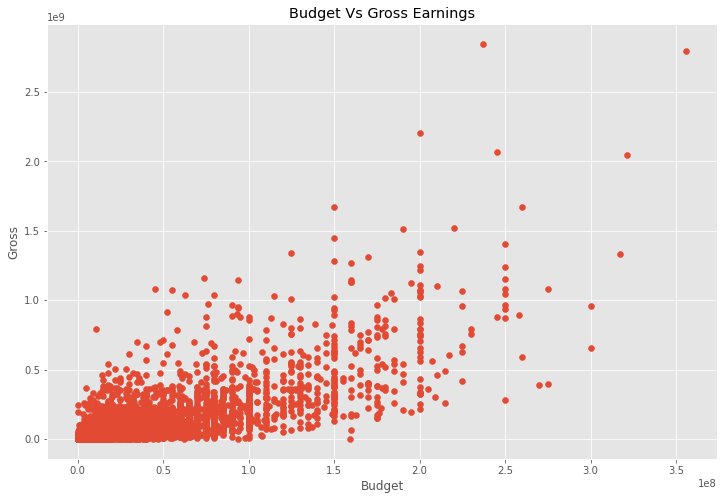

In [30]:
# Build scatter plot with budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget Vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross')

plt.show()

In [31]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

        released  score      votes       director              writer  \
5445  2009-12-18    7.8  1100000.0  James Cameron       James Cameron   
7445  2019-04-26    8.4   903000.0  Anthony Russo  Christopher Markus   
3045  1997-12-19    7.8  1100000.0  James Cameron       James Cameron   
6663  2015-12-18    7.8   876000.0    J.J. Abrams     Lawrence Kasdan   
7244  2018-04-27    8.4   897000.0  Anthony Russo  Christopher Markus   

                   star        country     budget       gross  \
5445    Sam Worthington  United States  237000000  2847246203   
7445  Robert Downey Jr.  United States  356000000  2797501328   
3045  Leonardo DiCaprio  United States  200000000  2201647264   
6663       Daisy Ridley  United States  245000000  2069521700   
7244  Robert Downey Jr.  United States  321000000  2048359754   

                    company  runtime correct_year  
5445  Twentieth Century Fox    162.0         2009  
7445         Marvel Studios    181.0         2019  
3045  Twentieth Century Fox    194.0         1997  
6663              Lucasfilm    138.0         2015  
7244         Marvel Studios    149.0         2018

<AxesSubplot:xlabel='budget', ylabel='gross'>

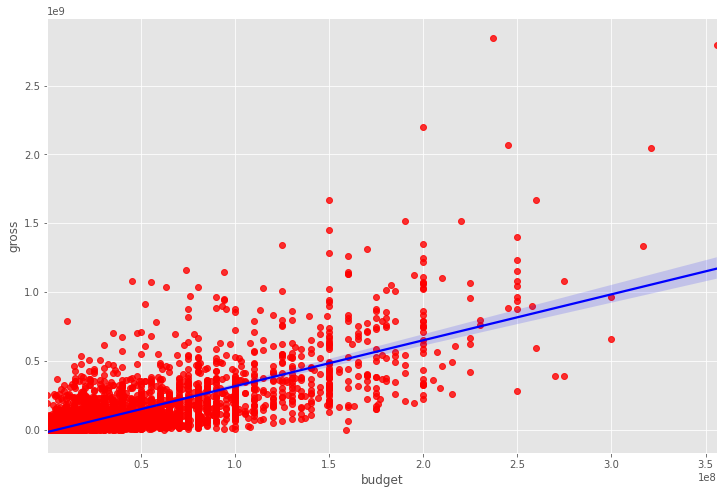

In [35]:
# plot budget vs gross 

sns.regplot(x='budget',y='gross',data=df, scatter_kws={'color':'red'},line_kws={'color':'blue'})

In [39]:
# correlation matrix with all numeric columns
df.corr('pearson')

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.329321  0.257486  0.120811
score    0.097995  1.000000  0.409182  0.076254  0.186258  0.399451
votes    0.222945  0.409182  1.000000  0.442429  0.630757  0.309212
budget   0.329321  0.076254  0.442429  1.000000  0.740395  0.320447
gross    0.257486  0.186258  0.630757  0.740395  1.000000  0.245216
runtime  0.120811  0.399451  0.309212  0.320447  0.245216  1.000000

In [41]:
# High correlation between budget and gross

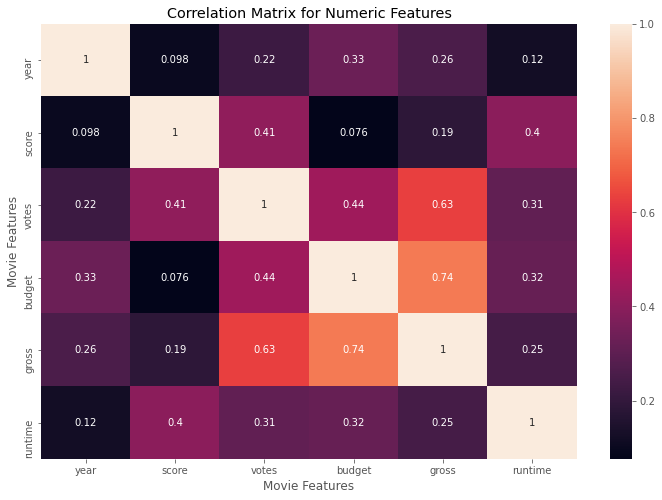

In [43]:
correlation_matrix = df.corr('pearson')

sns.heatmap(correlation_matrix,annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [44]:
# Looks at company correlation

df_number = df

for col_name in df_number.columns:
    if(df_number[col_name].dtype == 'object'):
        df_number[col_name] = df_number[col_name].astype('category')
        df_number[col_name] = df_number[col_name].cat.codes
df_number

name  rating  genre  year  released  score      votes  director  writer  \
0     6587       6      6  1980        24    8.4   927000.0      2589    4014   
1     5573       6      1  1980        28    5.8    65000.0      2269    1632   
2     5142       4      0  1980        25    8.7  1200000.0      1111    2567   
3      286       4      4  1980        28    7.7   221000.0      1301    2000   
4     1027       6      4  1980        32    7.3   108000.0      1054     521   
5     2109       6     10  1980        18    6.4   123000.0      2528    4362   
6     5574       6      0  1980        25    7.9   188000.0      1412     838   
7     4436       6      3  1980        49    8.2   330000.0      1829    1769   
8     5281       4      0  1980        74    6.8   101000.0      2306    1979   
9     6213       6      3  1980        19    7.0    10000.0      2864     423   
10     463       4      0  1980        48    6.1    18000.0       357    3985   
11    5920       4      1  1980       269    7.3    54000.0      1199    1832   
12    4315       4      1  1980        47    5.3    30000.0      2352    2333   
13    4084       6      6  1980        37    7.7    49000.0      2388    2327   
14    1687       6      5  1980        32    7.1    37000.0       318     520   
15    5024       4      6  1980        39    7.2    27000.0      1243    3548   
16    1900       6      6  1980        19    6.6    21000.0        49     735   
17      92       4      4  1980        49    6.9    29000.0       514    3262   
18    5865       6     10  1980        10    6.8    66000.0      1374    2104   
19    5189       6      4  1980        47    6.8    26000.0      2561     556   
20    1387       6      5  1980        12    6.5    20000.0      2891    4451   
21    2451       6      1  1980        66    6.8    14000.0      1892    2926   
22    5845       4      0  1980        33    6.7    22000.0       744    4192   
23    7445       4      8  1980        34    5.3    12000.0      2371    3528   
24    7127       4      6  1980        22    6.4    14000.0      1153      12   
25     346       6     10  1980        50    6.9    33000.0      1583    3234   
26    3263       6      4  1980        15    6.5     5100.0      2433    2483   
27    4442       4      0  1980        33    5.0     4100.0      1282      33   
28     980       6      5  1980        25    7.2    17000.0      2673    4386   
29     362       6      5  1980         9    6.2    22000.0      2151    3326   
30    3796       4      4  1980        38    7.1     8900.0      2811      83   
31    4373       6     10  1980        31    5.4    16000.0      2143    4455   
32    4987       4      0  1980        35    5.3    15000.0      1041    1587   
33    1103       4      6  1980        66    6.1      604.0      1644     958   
34    4785       4      4  1980        49    6.7     9100.0      1225    3136   
35    4362       6      4  1980        40    6.2    24000.0      1091    3107   
36    6008       6      4  1980        21    6.3     4300.0       855    1358   
37    3721       6      4  1980        41    6.0    11000.0      1598    3642   
38    6102       4      6  1980        49    5.9     4000.0      2296    3826   
39    1244       4      3  1980        13    7.5    17000.0      1884    4201   
40    6748       4      7  1980        90    6.3     5700.0      1403     518   
41     927       4      6  1980        29    7.9    13000.0       335    2252   
42    6644       6      0  1980        27    7.1     9000.0      2314    2543   
43    7305       6      3  1980        17    6.6    11000.0       186    1682   
44    5504       6     10  1980        42    4.8     2000.0      1978     151   
45    1152       6      4  1980        31    6.1    12000.0      2804    4298   
46    6094       6      0  1980        24    5.3     3900.0      1934    3357   
47    5578       6     10  1980        44    4.6     3900.0      2836    4344   
48    6360       4      0  1980      

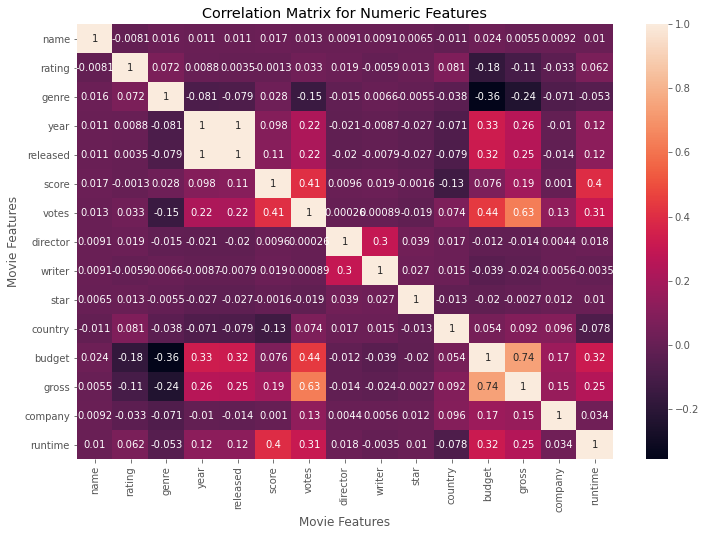

In [46]:
# plotted a corrlation matrix which color coded which variables have high and which have low correlation
correlation_matrix = df_number.corr('pearson')

sns.heatmap(correlation_matrix,annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [47]:
# correlation matrix between all the variables
df_number.corr()

name    rating     genre      year  released     score  \
name      1.000000 -0.008069  0.016355  0.011453  0.010696  0.017097   
rating   -0.008069  1.000000  0.072423  0.008779  0.003496 -0.001314   
genre     0.016355  0.072423  1.000000 -0.081261 -0.078592  0.027965   
year      0.011453  0.008779 -0.081261  1.000000  0.995343  0.097995   
released  0.010696  0.003496 -0.078592  0.995343  1.000000  0.107754   
score     0.017097 -0.001314  0.027965  0.097995  0.107754  1.000000   
votes     0.013088  0.033225 -0.145307  0.222945  0.218538  0.409182   
director  0.009079  0.019483 -0.015258 -0.020795 -0.020061  0.009559   
writer    0.009081 -0.005921  0.006567 -0.008656 -0.007863  0.019416   
star      0.006472  0.013405 -0.005477 -0.027242 -0.026632 -0.001609   
country  -0.010737  0.081244 -0.037615 -0.070938 -0.079153 -0.133348   
budget    0.023970 -0.176002 -0.356564  0.329321  0.323304  0.076254   
gross     0.005533 -0.107339 -0.235650  0.257486  0.252805  0.186258   
company   0.009211 -0.032943 -0.071067 -0.010431 -0.014068  0.001030   
runtime   0.010392  0.062145 -0.052711  0.120811  0.123356  0.399451   

             votes  director    writer      star   country    budget  \
name      0.013088  0.009079  0.009081  0.006472 -0.010737  0.023970   
rating    0.033225  0.019483 -0.005921  0.013405  0.081244 -0.176002   
genre    -0.145307 -0.015258  0.006567 -0.005477 -0.037615 -0.356564   
year      0.222945 -0.020795 -0.008656 -0.027242 -0.070938  0.329321   
released  0.218538 -0.020061 -0.007863 -0.026632 -0.079153  0.323304   
score     0.409182  0.009559  0.019416 -0.001609 -0.133348  0.076254   
votes     1.000000  0.000260  0.000892 -0.019282  0.073625  0.442429   
director  0.000260  1.000000  0.299067  0.039234  0.017490 -0.012272   
writer    0.000892  0.299067  1.000000  0.027245  0.015343 -0.039451   
star     -0.019282  0.039234  0.027245  1.000000 -0.012998 -0.019589   
country   0.073625  0.017490  0.015343 -0.012998  1.000000  0.054063   
budget    0.442429 -0.012272 -0.039451 -0.019589  0.054063  1.000000   
gross     0.630757 -0.014441 -0.023519 -0.002717  0.092129  0.740395   
company   0.133204  0.004404  0.005646  0.012442  0.095548  0.173214   
runtime   0.309212  0.017624 -0.003511  0.010174 -0.078412  0.320447   

             gross   company   runtime  
name      0.005533  0.009211  0.010392  
rating   -0.107339 -0.032943  0.062145  
genre    -0.235650 -0.071067 -0.052711  
year      0.257486 -0.010431  0.120811  
released  0.252805 -0.014068  0.123356  
score     0.186258  0.001030  0.399451  
votes     0.630757  0.133204  0.309212  
director -0.014441  0.004404  0.017624  
writer   -0.023519  0.005646 -0.003511  
star     -0.002717  0.012442  0.010174  
country   0.092129  0.095548 -0.078412  
budget    0.740395  0.173214  0.320447  
gross     1.000000  0.154840  0.245216  
company   0.154840  1.000000  0.034402  
runtime   0.245216  0.034402  1.000000

In [49]:
# list the correlation showing just between two variables
correlation_mat = df_number.corr()

corr_pairs= correlation_mat.unstack()

corr_pairs

name      name        1.000000
          rating     -0.008069
          genre       0.016355
          year        0.011453
          released    0.010696
          score       0.017097
          votes       0.013088
          director    0.009079
          writer      0.009081
          star        0.006472
          country    -0.010737
          budget      0.023970
          gross       0.005533
          company     0.009211
          runtime     0.010392
rating    name       -0.008069
          rating      1.000000
          genre       0.072423
          year        0.008779
          released    0.003496
          score      -0.001314
          votes       0.033225
          director    0.019483
          writer     -0.005921
          star        0.013405
          country     0.081244
          budget     -0.176002
          gross      -0.107339
          company    -0.032943
          runtime     0.062145
genre     name        0.016355
          rating      0.072423
        

In [50]:
# sorted the correlation pairs from previous code
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget    genre      -0.356564
genre     budget     -0.356564
gross     genre      -0.235650
genre     gross      -0.235650
rating    budget     -0.176002
budget    rating     -0.176002
genre     votes      -0.145307
votes     genre      -0.145307
country   score      -0.133348
score     country    -0.133348
gross     rating     -0.107339
rating    gross      -0.107339
genre     year       -0.081261
year      genre      -0.081261
released  country    -0.079153
country   released   -0.079153
genre     released   -0.078592
released  genre      -0.078592
country   runtime    -0.078412
runtime   country    -0.078412
company   genre      -0.071067
genre     company    -0.071067
year      country    -0.070938
country   year       -0.070938
genre     runtime    -0.052711
runtime   genre      -0.052711
writer    budget     -0.039451
budget    writer     -0.039451
genre     country    -0.037615
country   genre      -0.037615
rating    company    -0.032943
company   rating     -0.032943
year    

In [51]:
# Only shows variables that are highly correlated, which is defined as greater than 0.5
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross     votes       0.630757
votes     gross       0.630757
budget    gross       0.740395
gross     budget      0.740395
year      released    0.995343
released  year        0.995343
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# In Conclusion, Votes and Budget have the highest correlation to gross earnings